O que é a regressão logística?

[Algoritmo de Machine Learning. Existem vários. Esse é um dos tradicionais.]

O que faz?

Usamos para atribuir automaticamente um rótulo à um exemplo.


Clientes

Idade   Inadiplente?
        Inadiplente nos últimos 3 meses?

19        Sim (essa resposta quem faz é o algoritmo)
21        Não
32
47

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=2, class_sep=3)



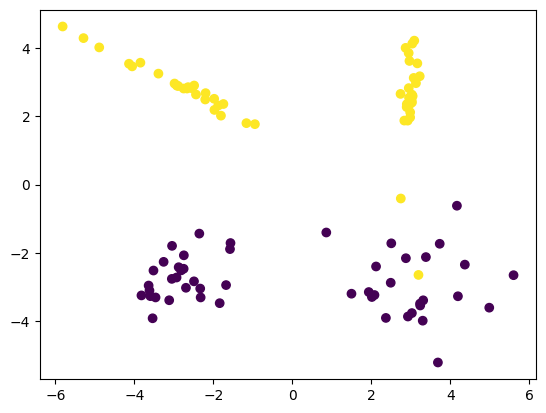

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y);

(19,1) => f (x) = > {Não}

f(x) é a nossa regressão logística e temos um método para chegar nessa função.

---

f(x) é linear - > f (x) = theta *x1 + theta*x2 + theta3*x3 +.... b (quanto mais fetures mais thetas)

Para saber se uma f(x) 'é melhor do que outra f(x)' usamos a noção de perda e custo

função de perda = -(y*log(p) + (1-y)*log(1-p))

função de custo = 1/n * sum (  -(y*log(p) + (1-y)*log(1-p)) ) (quanto mais próximo de 0 melhor)

Para otimizar (funções de custo e perda), iremos usar um algoritmo também: gradiente descendente

gradiente descendente:
  Tenta encontrar máximos e minimo de uma função, e o que queremos é minimizar a função de custo.
  Tenta encontrar parâmetros que minimizem a função objetivo. Ajuda a chegar no ponto mínimo.
  theta(i), b | i E 1...m



## Exercício 16 - Usando o gradiente descendente para reduziro a função de custo

In [3]:
# y = f(x) = x^2 - 2x

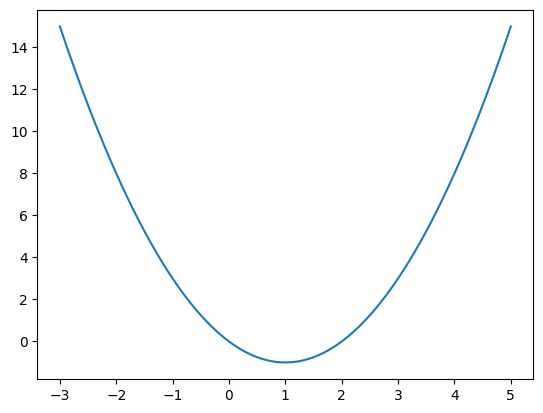

In [4]:
import numpy as np

X_poly = np.linspace(-3, 5, 81)

def cost_function(X):
  return X * (X-2)

y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly);

temos uma função e queremos achar o mínimo dela

In [5]:
# y = f(x) = x^2 - 2x

def gradient(X):
  return (2*X) - 2 # derivada  da função y


x_start = 4.5
learning_rate = 0.75 # taxa de aprendizado do algoritmo
x_next = x_start - learning_rate*gradient(x_start)
x_next

-0.75

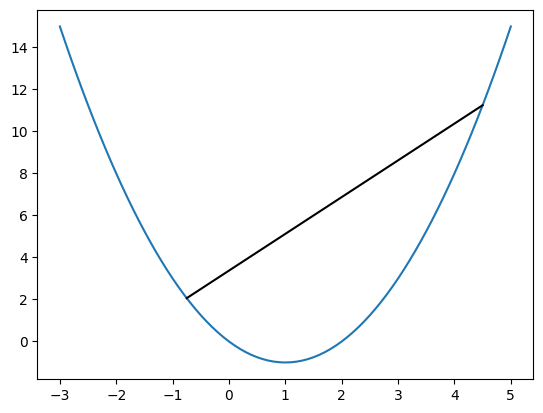

In [6]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)],'-0' );

In [7]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
#x_next = x_start - learning_rate*gradient(x_start)
for iteration_count in range (1, iterations):
  derivative = gradient (x_path[iteration_count-1])
  x_path[iteration_count] = x_path[iteration_count-1] - learning_rate*derivative
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

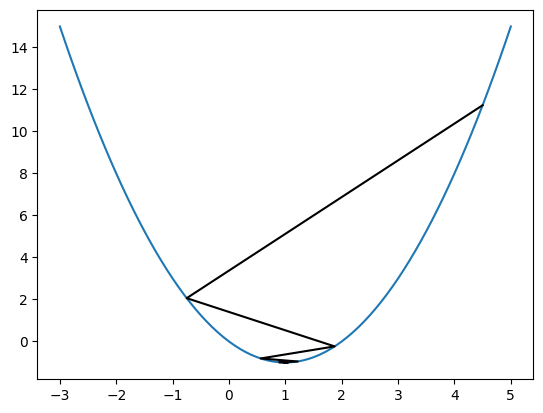

In [8]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path),'-0' );

### Ecercício 17: Gerando e modelando dados de classificação sintéticos

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [10]:
X_synthetic, y_synthetic = make_classification(n_samples=1000,
                           n_features=200,
                           n_informative=3,
                           n_redundant=10,
                           n_repeated=0,
                           n_clusters_per_class=2,
                           weights=None,
                           random_state=2, class_sep=0.8)

In [11]:
X_synthetic.shape, y_synthetic.shape

((1000, 200), (1000,))

1000 linhas e 200 features

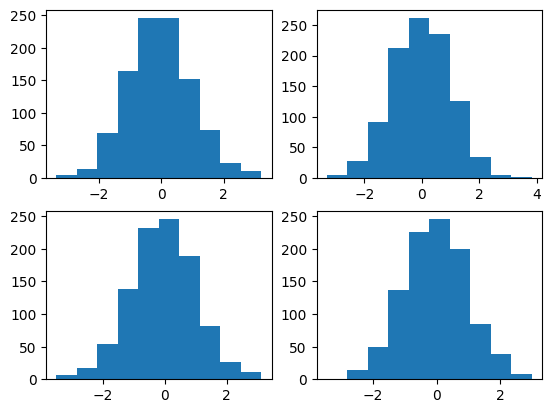

In [12]:
for plot_index in range (4):
  plt.subplot(2, 2, plot_index+1)
  plt.hist(X_synthetic[:, plot_index])

dividindo tudo em treino e teste

In [13]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=24)

In [14]:
X_synthetic.shape

(1000, 200)

In [15]:
X_syn_train.shape

(800, 200)

agora o treino tem 800 linhas e 200 features

In [16]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=24)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

quando maior o valor de c menos complexo o algoritmo, l1 e C SÃO MECANISMOQ QUE TEMOS para modificar o modelo resultante, penalty = l1  é um termo de regularização que me ajuda a reduzir a variancia e C consigo aumentar e diminuir a variancia

**********/**TREINO**/************



In [17]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

np.float64(0.9878861788617886)

agora queremos saber o quão bom o modelo performa


*   *************/**TESTE**/*********



In [18]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

np.float64(0.8742857142857142)

Como o treino está maior que o teste temos um forte indicio de overfitting, se ajustou aos dados de treino, mas os dados de teste não ficou tão alto. Concluindo, que a regularização pode ser usada para o ajsute do modelo. iremos usar a validação cruzada para resolver esse problema.

### Exercício 18: reduzindo o overfitting no problema de classificação de dados sintéticos

In [31]:
C_val_exponents = np.linspace(3, -3, 13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [27]:
C_vals =10.0**C_vals
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [21]:
from sklearn.metrics import roc_curve

**Não podemos testa vários valores de C nos dados de teste.**
Por isso, precisamos de dados de validação além dos dados de treino e teste. Se fizermos varios testes podemos viciar o algoritmo com esses dados.

precisamos de:

Treino, Validação e Teste



*   Treinar o modelo nos dados de treino
*   Validar diferentes valores de C nos dados de validação

*   E testar o modelo FINAL nos dados de teste (dados não vistos antes)


Cross-validation é uma tecnica mais robusta: divide os dados varias vezes em treino e validação.






In [50]:
SEED =42
np.random.seed(SEED)

def cross_val_C_search(k_folds, C_vals, X, Y):
    n_folds = k_folds.n_splits

    cv_train_roc_auc = []
    cv_test_roc_auc = []

    d_results = {}

    for c_val_counter in range(len(C_vals)):

        fold_counter = 0

        l_res_train = []
        l_res_test = []

        for train_index, test_index in k_folds.split(X, Y):

            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            model = LogisticRegression(solver='liblinear', penalty='l1', C=C_vals[c_val_counter], random_state=SEED)
            model.fit(X_cv_train, y_cv_train)

            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc_kfold = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:, 1])

            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc_kfold = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:, 1])

            l_res_train.append(cv_train_roc_auc_kfold)
            l_res_test.append(cv_test_roc_auc_kfold)

            fold_counter += 1

        print(f'{fold_counter} {l_res_train} {l_res_test}')

        d_results[C_vals[c_val_counter]] = [l_res_train, l_res_test]

        cv_train_roc_auc.append(l_res_train)
        cv_test_roc_auc.append(l_res_test)

        print(f'Done with C = {model.C}')

    return cv_train_roc_auc, cv_test_roc_auc, model, d_results

from sklearn.model_selection import StratifiedKFold

n_folds = 4
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
cv_train_roc_auc, cv_test_roc_auc, model, d_results = cross_val_C_search(k_folds, C_vals, X_syn_train, y_syn_train)



4 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)] [np.float64(0.8231792717086835), np.float64(0.8007703081232493), np.float64(0.8477129416474827), np.float64(0.8032229006105495)]
Done with C = 1000.0
4 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)] [np.float64(0.8247799119647858), np.float64(0.803421368547419), np.float64(0.8584225803222901), np.float64(0.8056250625563006)]
Done with C = 316.22776601683796
4 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)] [np.float64(0.833033213285314), np.float64(0.8055222088835534), np.float64(0.865478931037934), np.float64(0.8079271344209789)]
Done with C = 100.0
4 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)] [np.float64(0.8389355742296919), np.float64(0.8141756702681072), np.float64(0.8726353718346512), np.float64(0.8084275848263437)]
Done with C = 31.622776601683793
4 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)] [np.float64(0.85494197679

In [76]:
x_pred = []
y_pred_train = []
y_pred_test = []


for C, v in d_results.items():
  print(f'{C:.2f} {np.mean(v[0]):.2f}, {np.mean(v[1]):.2f}')

  x_pred.append(C)
  y_pred_train.append(np.mean(v[0]))
  y_pred_test.append(np.mean(v[1]))


1000.00 1.00, 0.82
316.23 1.00, 0.82
100.00 1.00, 0.83
31.62 1.00, 0.83
10.00 1.00, 0.84
3.16 1.00, 0.85
1.00 1.00, 0.87
0.32 0.98, 0.90
0.10 0.95, 0.92
0.03 0.93, 0.93
0.01 0.92, 0.92
0.00 0.69, 0.68
0.00 0.50, 0.50


O melhor numero aqui é o 0.03, pois tem valores altos e a diferença entre eles é mínima.


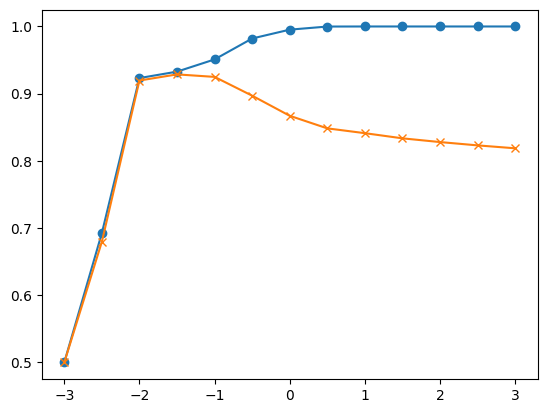

In [80]:
plt.plot(C_val_exponents, y_pred_train, '-o');
plt.plot(C_val_exponents, y_pred_test, '-x')

In [64]:
cv_train_roc_auc[2]

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]

**fazendo o teste**

In [89]:
C = 10.0 ** -1.5

model = LogisticRegression(solver='liblinear', penalty='l1', C=C, random_state=SEED)
model.fit(X_syn_train, y_syn_train)

# Previsões de probabilidade para o treino
y_cv_train_predict_proba = model.predict_proba(X_syn_train)

# Cálculo do ROC AUC no treino
cv_train_roc_auc_kfold = roc_auc_score(y_syn_train, y_cv_train_predict_proba[:, 1])

# Previsões de probabilidade para o teste
y_cv_test_predict_proba = model.predict_proba(X_syn_test)

# Cálculo do ROC AUC no teste
cv_test_roc_auc_kfold = roc_auc_score(y_syn_test, y_cv_test_predict_proba[:, 1])

In [90]:
cv_train_roc_auc_kfold, cv_test_roc_auc_kfold

(np.float64(0.9325015634771733), np.float64(0.930325814536341))

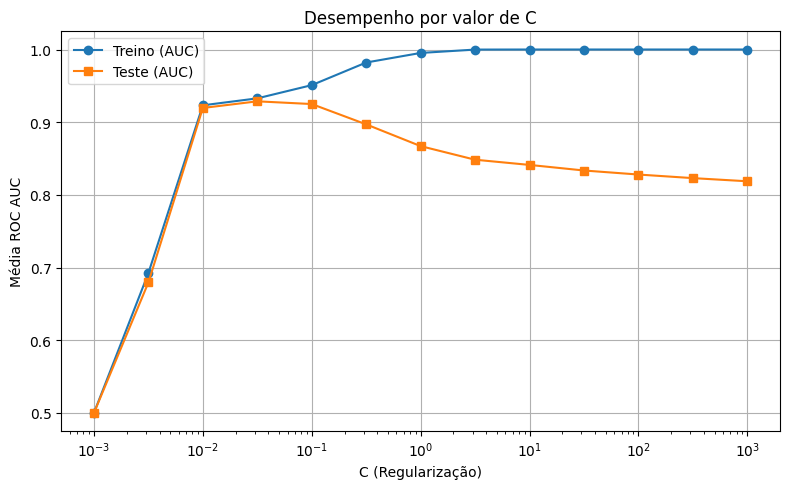

In [67]:
C_vals_plot = []
train_auc_means = []
test_auc_means = []

# Coletar dados do d_results
for C, v in sorted(d_results.items()):
    C_vals_plot.append(C)
    train_auc_means.append(np.mean(v[0]))
    test_auc_means.append(np.mean(v[1]))

plt.figure(figsize=(8, 5))
plt.plot(C_vals_plot, train_auc_means, marker='o', label='Treino (AUC)')
plt.plot(C_vals_plot, test_auc_means, marker='s', label='Teste (AUC)')
plt.xscale('log')  # se os valores de C estiverem em escala logarítmica, como [0.01, 0.1, 1, 10]
plt.xlabel('C (Regularização)')
plt.ylabel('Média ROC AUC')
plt.title('Desempenho por valor de C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()